<h1 style="color:#ff5500; font-family:Play; font-size:3em; margin:auto 32px;align:center">Part II - Initial Exploratory Data Analysis</h1>

---


This document is a part of the FACEIT Predictor Data Science Workflow.

In this notebook it is performed an initial analysis of the dataset.

# Imports

In [1]:
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# enable imports from parent directory
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

# local modules
from src.db.config import read_config
from src.utils.loaders import read_data
from src.visualization.defaults import set_visualization_defaults

from IPython import get_ipython

ipython = get_ipython()

# autoreload extension
if "autoreload" not in ipython.extension_manager.loaded:
   %load_ext autoreload

# autoreload python modules
%autoreload 2

In [2]:
set_visualization_defaults()

# Load Interim Data - One Batch

In [3]:
batch_data = read_data("interim", no_batches=1, read_all=False)

# Initial Exploratory Data Analysis

In [4]:
print('Shape of the data', batch_data.shape)
batch_data.head()

Shape of the data (2001, 9)


,_id,startTime,mapPlayed,score,parties,entity,entityName,teamA,teamB
0,1-0002441e-bec7-4746-9c01-81560aeb145f,1582309092,de_dust2,16 / 11,{'1c73a556-2da0-46da-a18e-1a827d3a442b': ['824...,matchmaking,CS:GO 5v5 PREMIUM,[{'id': '82432d4b-9823-4f3a-82e6-063d2ab26a1c'...,[{'id': '371e87d2-f5ed-426b-8c27-efbd8bfda1f5'...
1,1-00044d9e-77bd-4a14-bc36-ea864858ac9a,1582210618,de_cache,16 / 12,{'01fd58ef-bd1a-4926-9423-af6f1ad78d31': ['2d0...,matchmaking,CS:GO 5v5,[{'id': '4773b555-5a4f-4a4e-b6a2-8353e315958e'...,[{'id': '2d0acf3e-915c-43d7-adf1-1bad5467943c'...
2,1-00052bb7-c844-4004-b17d-868b6ed7a645,1582201298,de_mirage,16 / 11,{'03b4db45-ff3f-4a93-aade-223fc5aa31e1': ['03b...,matchmaking,CS:GO 5v5,[{'id': '87d5d8f5-7276-4ae6-87be-8b5465be37b4'...,[{'id': 'e8d3abbc-8e60-43d1-92be-69f5a891913b'...
3,1-00055c82-b90a-4395-b7c6-f032eb106230,1582329709,de_mirage,16 / 13,{'5835d91a-3f98-4bb2-a14b-883b5967244b': ['583...,matchmaking,CS:GO 5v5,[{'id': '3518b5ad-4618-4747-9577-7795c48f5cdc'...,[{'id': '2ba15742-0ccb-47a2-bb6e-06a0887a40ed'...
4,1-00061954-f2ac-44c0-a7a8-ace5c2139e65,1581001380,de_dust2,16 / 10,{'36b6772a-21ce-4636-989a-8af9f58e4c02': ['085...,matchmaking,CS:GO 5v5 PREMIUM,[{'id': 'd703c44c-1b38-4668-9cf3-790efa24f726'...,[{'id': '419b372a-d3d2-423b-8a63-ca341c33e6a7'...


In [5]:
batch_data = batch_data.convert_dtypes()

In [6]:
batch_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         2001 non-null   string
 1   startTime   2001 non-null   Int64 
 2   mapPlayed   2001 non-null   string
 3   score       2001 non-null   string
 4   parties     2001 non-null   object
 5   entity      2001 non-null   string
 6   entityName  2001 non-null   string
 7   teamA       2001 non-null   object
 8   teamB       2001 non-null   object
dtypes: Int64(1), object(3), string(5)
memory usage: 158.3+ KB


Data has no missing values.

## Univariate Analysis

In this sub section several fields are analyzed independently of each other.

### Start Time

In [7]:
batch_data["startTime_dt"] = pd.to_datetime(batch_data['startTime'], unit='s')
batch_data["startTime_day_of_year"] = batch_data["startTime_dt"].dt.dayofyear
batch_data["startTime_day_of_week"] = batch_data["startTime_dt"].dt.dayofweek
batch_data["startTime_hour"] = batch_data["startTime_dt"].dt.hour

In [8]:
max_date = batch_data["startTime_dt"].max()
min_date = batch_data["startTime_dt"].min()
print("Max date:", batch_data["startTime_dt"].max())
print("Min date:", batch_data["startTime_dt"].min())
print("Date Range:", max_date-min_date)

Max date: 2020-02-28 17:34:04
Min date: 2020-02-03 17:49:21
Date Range: 24 days 23:44:43


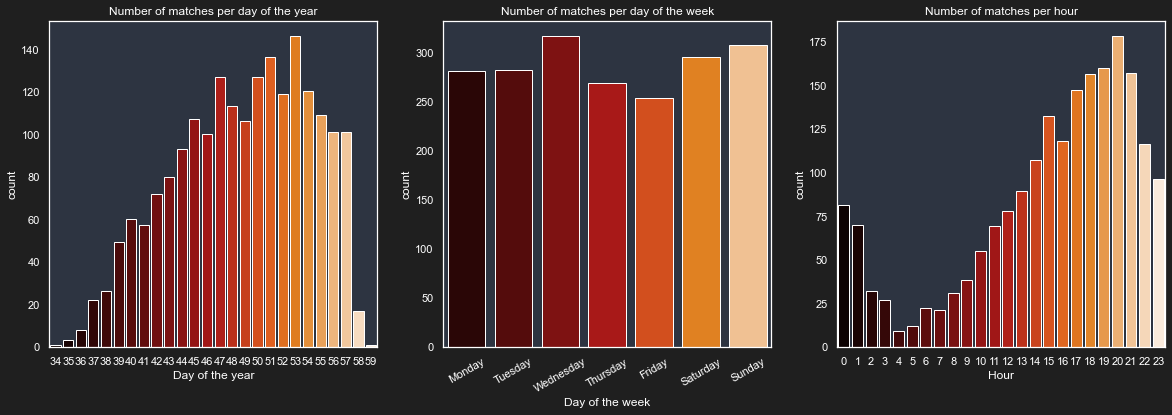

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20,6)

sns.countplot(data=batch_data,x="startTime_day_of_year", ax=ax1, palette="gist_heat")
ax1.set_title("Number of matches per day of the year")
ax1.set_xlabel("Day of the year")

sns.countplot(data=batch_data,x="startTime_day_of_week", ax=ax2, palette="gist_heat")
ax2.set_title("Number of matches per day of the week")
ax2.set_xlabel("Day of the week")
ax2.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], rotation = 30)

sns.countplot(data=batch_data,x="startTime_hour", ax=ax3, palette="gist_heat")
ax3.set_title("Number of matches per hour")
ax3.set_xlabel("Hour");

### Parties

In [10]:
batch_data["num_parties"] = batch_data["parties"].apply(lambda x: len(x))

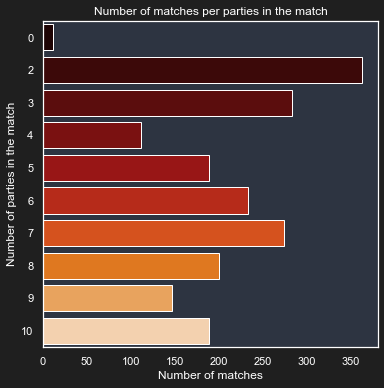

In [11]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=batch_data, y="num_parties", palette="gist_heat")
ax.set_title("Number of matches per parties in the match")
ax.set_ylabel("Number of parties in the match")
ax.set_xlabel("Number of matches");

Dive deeper into the matches where the number of parties is zero.

In [47]:
zero_parties_data = batch_data[batch_data["num_parties"]==0]
zero_parties_data.head(5)

,_id,startTime,mapPlayed,score,parties,entity,entityName,teamA,teamB,startTime_dt,startTime_day_of_year,startTime_day_of_week,startTime_hour,num_parties,rounds_A,rounds_B,total_rounds,winner
191,1-00c4e226-7a88-423b-a10c-82530405b5f6,1581720930,de_mirage,16 / 6,{},championship,Probationary Series,[{'id': '0121755f-a3fe-413f-a9cf-59afe9db1587'...,[{'id': 'e5195723-2519-429a-bd7a-ca5b3ff85f7c'...,2020-02-14 22:55:30,45,4,22,0,16,6,22,0
363,1-015467ec-84fc-46b4-8039-73b3baff920d,1582052898,de_dust2,16 / 10,{},championship,Loyalty Series,[{'id': 'e11b36b6-e101-4173-9fba-ec1af21048b1'...,[{'id': 'ea49d65c-1e8a-475e-b25e-dc35156e4cc2'...,2020-02-18 19:08:18,49,1,19,0,16,10,26,0
368,1-015711c5-1295-4995-bb39-3ded04a44d00,1582375734,de_train,16 / 9,{},championship,CS GO MEGOGO Open Qualifier 2,[{'id': '7fe48ae7-5c9b-4136-adeb-7dd5d04083fb'...,[{'id': 'b5178a98-e9f1-47d9-80ac-13716332c313'...,2020-02-22 12:48:54,53,5,12,0,16,9,25,0
722,1-0295f8a6-c15a-4124-b8b2-e4fca2a58839,1581798869,de_overpass,16 / 4,{},championship,SKINBARON POKAL S10 Cup 10,[{'id': '1d778ae0-ef1a-4608-bbbb-402865add92e'...,[{'id': '6155353c-66e1-4846-bcda-2f2c3ca6d718'...,2020-02-15 20:34:29,46,5,20,0,16,4,20,0
887,1-03369e0a-2708-4678-9ca6-21aea8cb5a48,1582647086,de_overpass,19 / 22,{},championship,KING OF NORDIC S15E4 FINNISH QUALIFIER,[{'id': 'b6cc6640-c6c5-462b-abe7-55f8d695340f'...,[{'id': 'cff5ea7c-dc06-461a-9c76-cc70f64d6002'...,2020-02-25 16:11:26,56,1,16,0,19,22,41,1


All matches with zero parties correspond to championship (tournament) matches where players participate as a team of 5 instead of being in separate parties.

In [50]:
all(zero_parties_data.entity == 'championship')

True

### Map Played

In [25]:
x_ticks_descending_count = batch_data.groupby("mapPlayed").size().sort_values(ascending=False).index

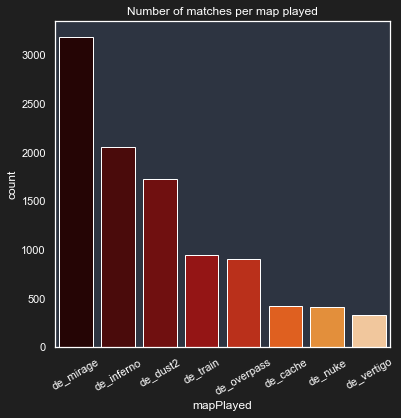

In [26]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=batch_data, x="mapPlayed", order=x_ticks_descending_count, palette="gist_heat")
ax.set_title("Number of matches per map played")
plt.xticks(rotation=30);

### Entity

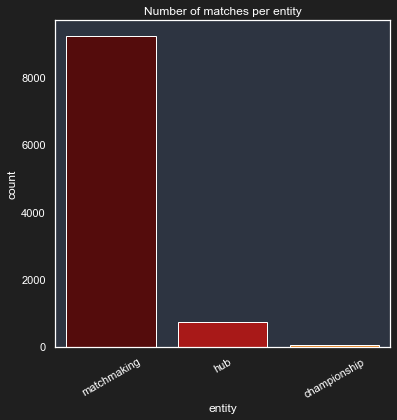

In [27]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=batch_data, x="entity", palette="gist_heat")
ax.set_title("Number of matches per entity")
plt.xticks(rotation=30);

### Entity Name

In [28]:
count_matches_per_entity_name = batch_data.groupby("entityName").size().sort_values(ascending=False)
entity_name_data = pd.DataFrame({
    "entityName":count_matches_per_entity_name.index,
    "no_matches":count_matches_per_entity_name.values,
    "perc_matches": 100*count_matches_per_entity_name.values/len(batch_data)})

In [29]:
print("Number of unique entity names:", entity_name_data.entityName.nunique())
entity_name_data.head(10)

Number of unique entity names: 68


,entityName,no_matches,perc_matches
0,CS:GO 5v5,6261,62.603740
1,CS:GO 5v5 PREMIUM,2954,29.537046
2,LEGENDS - 2700 ELO to enter,118,1.179882
3,ROPL - Gold League,73,0.729927
4,Danish Pro League - A,69,0.689931
5,Danish Pro League - B,63,0.629937
6,Turkish Stars League - Viewsonic Master Division,62,0.619938
7,ECL Division 1 (2700 ELO MAX),55,0.549945
8,ROPL - Silver League,42,0.419958
9,FPL CSGO Challenger Europe,29,0.289971


### Team Rounds

In [30]:
unwind_score = batch_data["score"].str.split(" / ", expand=True) \
    .astype(int) \
    .rename(columns={0:"rounds_A",1:"rounds_B"})
unwind_score.head()

,rounds_A,rounds_B
0,16,11
1,16,12
2,16,11
3,16,13
4,16,10


In [31]:
batch_data = batch_data.join(unwind_score)
batch_data["total_rounds"] = batch_data["rounds_A"] + batch_data["rounds_B"]

CSGO is played under a "best-of" 30 rounds format, meaning that the first team to reach 16 rounds wins the match. Therefore, a minimum of 16 rounds should be played on every match.

However if after 30 rounds, the teams are tied 15-15, then an 6-round overtime is played to find the winner. Overtimes are repeated endlessly until a winner is found.

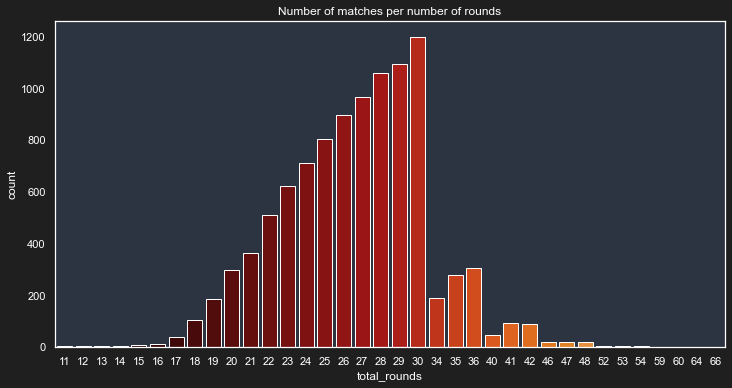

In [40]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=batch_data, x="total_rounds", palette="gist_heat")
ax.set_title("Number of matches per number of rounds");

The data contains matches where the total number of rounds played is less than 16. Most likely it corresponds to [forfeited matches](https://support.faceit.com/hc/en-us/articles/207569009-Forfeiting-a-CS-GO-match-).

Forfeited matches usually represent very unbalanced (one-sided) matches and must have atleast 11 played rounds.


In [35]:
forfeited_matches = batch_data[batch_data.total_rounds < 16]

In [66]:
print("Total rounds is greater or equal than 11 for all matches:", all(forfeited_matches.total_rounds >= 11))

Total rounds is greater or equal than 11 for all matches: True


In [89]:
abs_round_diff = abs(forfeited_matches["rounds_A"] - forfeited_matches["rounds_B"])
abs_round_diff_df = pd.DataFrame(abs_round_diff.value_counts().reset_index().astype(int))
abs_round_diff_df.columns = ["Round Difference", "Number of matches"]
abs_round_diff_df

,Round Difference,Number of matches
0,11,18
1,12,10
2,13,2
3,14,2


Given the two points explored above, one can assume with reasonable confidence that the matches with less than 16 rounds correspond to forfeited matches.

### Winner

In [90]:
batch_data["winner"] = batch_data.apply(lambda x: 0 if x["rounds_A"]>x["rounds_B"] else 1, axis=1)
print("Mean winner", batch_data["winner"].mean())
batch_data.groupby("winner").size()

Mean winner 0.4938506149385061


winner
0    5062
1    4939
dtype: int64

The main goal of this project is to predict the outcome of FACEIT matches. For that reason, the winner column should be the binary target variable. 

The mean value of the winner column is quite close to 0.5, which means the data is balanced. 